## 径向波函数

$$\begin{array}{l}{{R_{n l}(r)}} {{=\sqrt{(\frac{2}{n a})^{3}\frac{(n-l-1)!}{2n(n+l)!}}e^{-r/n a}(\frac{2l}{n a})^{l}L_{n-l-1}^{2l+1}(2r/n a)}}\end{array}$$

## 关联拉盖尔多项式（Associate Laguerre Polynomial）

$L_{q-p}^{p}(x)=(-1)^{p}(\textstyle{\frac{d}{d x}})^{q}L_{q}(x)$

## 拉盖尔多项式（Laguerre Polynomial）

$L_{q}(x)=e^{x}\!\left({\textstyle{\frac{d}{d x}}}\right)^{q}\!\left(e^{-x}x^{q}\right)$

## 氢原子角向波函数（球谐函数）（spherical harmonics）

$\begin{array}{l}{{Y_{l}^{m}(\theta,\phi)=\sqrt{\frac{(l-|m|)!}{(l+|m|)!}\frac{2l+1}{4\pi}}P_{l}^{|m|}(\cos\theta)e^{i m\phi}}}\\ {{(l=0,1,2...;m=0,\pm1,\pm2,.\,.\,.\pm l)}}\end{array}$

## 关联勒让德多项式（Associate Legendre Polynomials）

$P_{l}^{|m|}(x)=\frac{(1-x^{2})^{\frac{|m|}{2}}}{2^{l}l!}\frac{d^{l+|m|}}{d x^{l+|m|}}(x^{2}-1)^{l}$

# 氢原子波函数（Hydrogen wave function）

# $\begin{array}{l}{{\psi_{n l m}=\sqrt{\left(\frac2{n a}\right)^{3}\frac{(n-l-1)!}{2n(n+l)!}}e^{-r/n a}(\frac{2l}{n a})^{l}[L_{n-l-1}^{2l+1}(2r}}{{/n a)]Y_{l}^{m}(\theta,\phi)}}\end{array}$

# 1. 勒让德多项式和盖尔多项式

In [1]:
# 生成拉盖尔多项式和关联拉盖尔多项式
import math
import numpy as np

# Laguerre polynomial
# 输出对应k阶拉盖尔多项式系数列表
def Laguerre(k):
    c_list = []
    for j in range(k+1):
        c_u = math.factorial(k)
        c_l = math.factorial(k-j)*math.pow(math.factorial(j),2)
        c = math.pow(-1, j)*c_u/c_l
        c_list.append(c)            
    return c_list

# Factorial function
# 分数阶乘函数
def Factorial(n):
    if n == 0:
        return 1
    elif n < 0:
        print('there is a number < 0 in the Factorial function!')
        return 1
    else:
        s = 1
        while n > 0:
            s *= n
            n -= 1
        return s

# Associated Laguerre polynomials 
# 输出对应k阶参数p的关联拉盖尔多项式系数列表
def Associate_Laguerre(k, p):
    c_list = []
    for j in range(k+1):
        c_u = Factorial(k+p)
        c_l = Factorial(k-j)*Factorial(p+j)*Factorial(j)
        c = math.pow(-1, j)*c_u/c_l
        c_list.append(c)            
    return c_list

# Testing Laguerre polynomial
for i in range(5):
    print(Laguerre(i))
# Testing Associated Laguerre polynomials 
for n in range(5):
    for l in range(n):
        p = l + 0.5
        k = (n-l)//2
        print(Associate_Laguerre(k, p))


# 生成勒让德多项式和关联勒让德多项式




[1.0]
[1.0, -1.0]
[1.0, -2.0, 0.5]
[1.0, -3.0, 1.5, -0.16666666666666666]
[1.0, -4.0, 3.0, -0.6666666666666666, 0.041666666666666664]
[1.0]
[1.5, -1.0]
[1.0]
[1.5, -1.0]
[2.5, -1.0]
[1.0]
[1.875, -2.5, 0.5]
[2.5, -1.0]
[3.5, -1.0]
[1.0]
[[ 1.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.   ]
 [-0.5    0.     1.5    0.     0.     0.   ]
 [ 0.    -1.5    0.     2.5    0.     0.   ]
 [ 0.375  0.    -3.75   0.     4.375  0.   ]
 [ 0.     1.875  0.    -8.75   0.     7.875]]
1.299038105676658


In [5]:
import math
import numpy as np

# Comb function
# 排列组合函数
def comb(k,l):
    result_u = 1
    temp = k
    for i in range(l):
        result_u *= temp
        temp -= 1
    result_l = math.factorial(l)
    return result_u/result_l

# Legendre Polynomials  
# 输出对应n阶之下所有阶数勒让德多项式系数列表 
def legendre(n):
    a = np.zeros((n, n))
    for l in range(n):
        for k in range(l+1):
            if l==0 and k==0:
                a[l][k] = 1
            elif (l+k) % 2 == 0:
                a_back = comb(l, int((l+k)/2))
                a_u = np.prod(np.arange(1, l+1)+np.ones(l)*k)
                a[l][k] = np.power(-1, (l-k)/2)*a_u*a_back/(2**l*math.factorial(l))
    return a

# Associated Legendre Polynomials
# 输出对应参数为n，m，x的关联勒让德多项式的值 
def associate_legendre(n, m, x):
    leg = legendre(n+1)[-1]
    result_front = (1-x**2)**(m/2)
    ass_leg = leg[m:]
    temp = 0
    for i in range(len(ass_leg)):
        driv_max_num = i + m
        for j in range(m):
            ass_leg[i] *= driv_max_num
            driv_max_num -= 1
        temp += ass_leg[i]*(x**i)
    return result_front*temp

# Testing Legendre Polynomials
print(legendre(6))
# Testing Associated Legendre Polynomials
print(associate_legendre(2, 1, 0.5))

[[ 1.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.   ]
 [-0.5    0.     1.5    0.     0.     0.   ]
 [ 0.    -1.5    0.     2.5    0.     0.   ]
 [ 0.375  0.    -3.75   0.     4.375  0.   ]
 [ 0.     1.875  0.    -8.75   0.     7.875]]
1.299038105676658


# 2. 径向函数可视化

In [2]:
# Radical wave function
# 输入主量子数n和角量子数l，输出r和R的列表数据
def R_nl(n, l):
    # initializing steps
    r = np.linspace(0,1e-9,100)
    a = 0.529e-10
    normal_l = math.pow(n*a,3)*2.0*n*math.factorial(n+l)
    normal_u = 8.0*math.factorial(n-l-1)
    normal = math.sqrt(normal_u/normal_l)

    r_1 = []
    for i in r:
        r_1.append(math.exp(-i/(n*a)))
    
    r_2 = []
    for i in r:
        r_2.append(math.pow(2.0*i/(n*a), l))
    
    k = n-l-1
    p = 2*l+1
    Ass_Laguerre = Associate_Laguerre(k,p)
    r_3 = []
    for i in r:
        num_laguerre = 0
        for j in range(len(Ass_Laguerre)):
            num_laguerre += Ass_Laguerre[j] * math.pow(2.0*i/(n*a),j)
        r_3.append(num_laguerre)
    
    y = [normal*r_1[i]*r_2[i]*r_3[i] for i in range(len(r))]
    x = r
    
    # output parameters
    # print(normal, np.mean(r_1), np.mean(r_2), np.mean(r_3), np.mean(y))
    return x, y

## 径向波函数

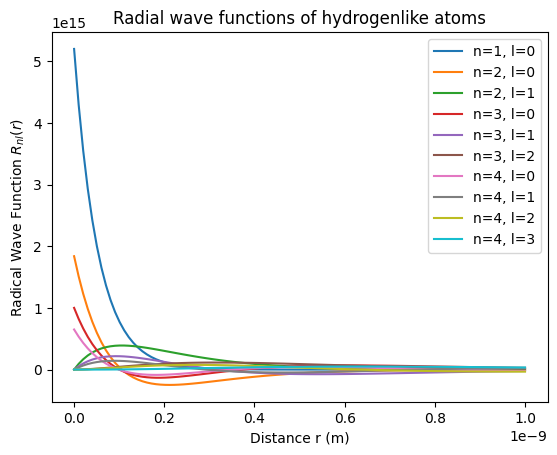

In [4]:
import matplotlib.pyplot as plt
# initialize your max n
max_n = 5

# ploting the radical wave function
nl_list = []
x_list = []
y_list = []
for n in range(1, max_n):
    for l in range(0, n):
        nl_list.append([n, l])
        x_nl, y_nl = R_nl(n, l)
        x_list.append(x_nl)
        y_list.append(y_nl)

for temp in range(len(nl_list)):
    plt.plot(x_list[temp], y_list[temp], label='n={0}, l={1}'.format(nl_list[temp][0], nl_list[temp][1]))
plt.xlabel('Distance r (m)')
plt.ylabel('Radical Wave Function $R_{nl}(r)$')
plt.title('Radial wave functions of hydrogenlike atoms')
plt.legend()

## 径向电子概率分布可视化

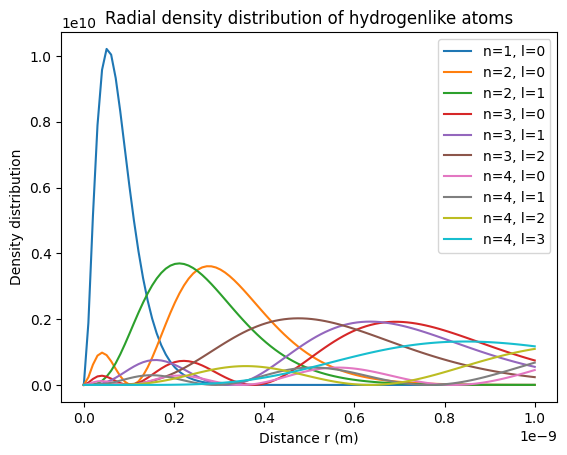

In [6]:
# ploting Electron radial density distribution
r = []
for temp in range(len(nl_list)):
    r_temp = [x_list[temp][i]**2*(y_list[temp][i]**2) for i in range(len(x_list[temp]))]
    r.append(r_temp)
    plt.plot(x_list[temp], r_temp, label='n={0}, l={1}'.format(nl_list[temp][0], nl_list[temp][1]))
plt.xlabel('Distance r (m)')
plt.ylabel('Density distribution')
plt.title('Radial density distribution of hydrogenlike atoms')
plt.legend()

# 3. 角向函数（球谐函数）可视化

In [7]:
# Spherical harmonics
# 输入量子数l和m，以及对应的空间坐标theta, phi，得到对应球谐函数数值
def Spherical(l, m, theta, phi):
    normal_u = (2*l+1)*math.factorial(l-m)
    normal_l = 4*math.pi*math.factorial(l+m)
    normal = (-1)**m*math.sqrt(normal_u/normal_l)
    # s_1 = math.exp(i*m*phi)
    s_1 = math.cos(m*phi)
    s_2 = associate_legendre(l, m, math.cos(theta))
    return normal*s_1*s_2
    
# ploting Spherical harmonics
# 输入量子数l和m，得到对应一个球谐函数的数据列表
def plot_ml(m, l):
    theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
    temp = []
    for t in theta:
        for p in phi:
            r = Spherical(l,m,t,p)**2
            temp.append([t, p, r])
    x = [temp[i][2]*math.sin(temp[i][0])*math.cos(temp[i][1]) for i in range(len(temp))]
    y = [temp[i][2]*math.sin(temp[i][0])*math.sin(temp[i][1]) for i in range(len(temp))]
    z = [temp[i][2]*math.cos(temp[i][0]) for i in range(len(temp))]
    return x, y, z

# 4.波函数可视化

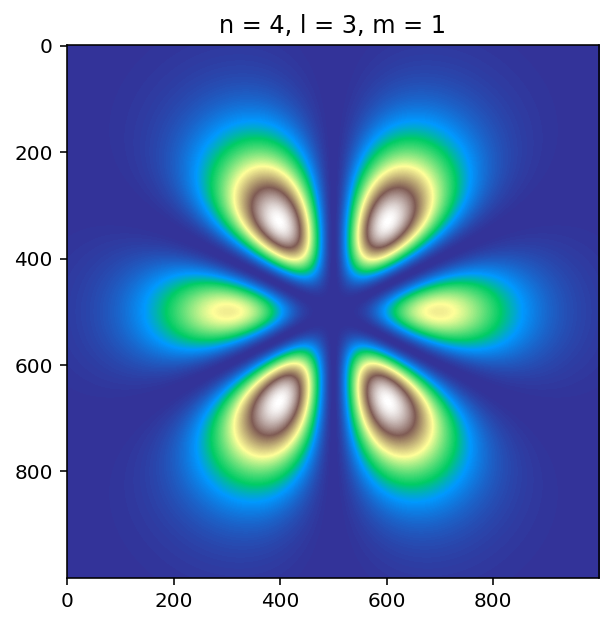

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spe
import scipy.constants as const

def cart2sph(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos( z / r )
    phi = np.arctan(y / x)
    return np.array([r, theta, phi])

def R_nl(r,n=1,l=0):
    a0 = const.value(u"Bohr radius")
    coeff = np.sqrt(
        (2.0/(a0*n))**3 * 
        spe.factorial(n-l-1) /(2.0*(n)*spe.factorial(n+l)))
    laguerre = spe.assoc_laguerre(2.0*r/(a0*n),n-l-1,2*l+1)
    return coeff * np.exp(-r/(a0*n)) * (2.0*r/(a0*n))**l * laguerre

def wave_function(r, theta, phi, n, l, m):
    return R_nl(r, n, l) * spe.sph_harm(m, l, phi, theta)

def ab(n, l):
    if l < n // 2:
        a = -1e-10 * (n + l)
    else:
        a = -1e-10 * n**2
    return a, -a

n = 4 # n = 1, 2, 3 ...
l = 3 # l = 0, 1, ... , n-1
m = 1 # m = -l, -l+1, ... -1, 0, 1, ... l-1, l

a, b = ab(n, l)
x = np.linspace(a, b, 1000)
y = 0
z = np.linspace(a, b, 1000) 
X, Z = np.meshgrid(x, z)

r, theta, phi = cart2sph(X, y, Z)
psi = wave_function(r, theta, phi, n, l, m)
density = np.abs(psi)**2

fig = plt.figure(dpi = 144)
ax = fig.gca()
ax.imshow(density, cmap = "terrain")
plt.title('n = {0}, l = {1}, m = {2}'.format(n, l, m))
plt.show()